In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
pwr = np.fromfile('/mnt/disk/chinese-spaceplane/pwr_100Hz.f32', dtype = 'float32')
t_start = np.datetime64('2020-09-15T17:13:43')
t = t_start + np.arange(pwr.size) * 1e-2 * 1e9 * np.timedelta64(1, 'ns')

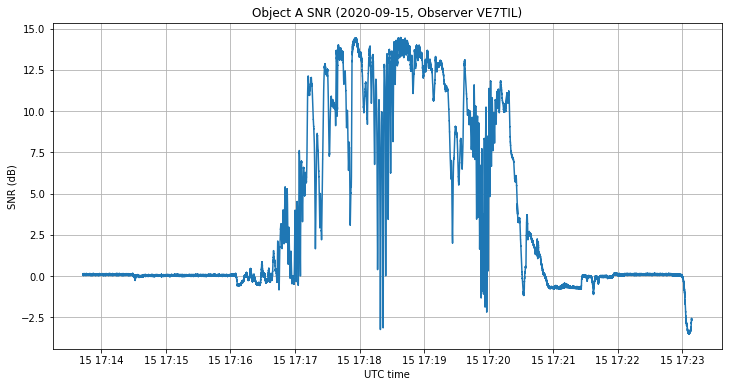

In [3]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(t, 10*np.log10(pwr) - 31.5)
plt.title('Object A SNR (2020-09-15, Observer VE7TIL)')
plt.ylabel('SNR (dB)')
plt.xlabel('UTC time')
plt.grid()

In [4]:
fsym = 3069000
symbols = np.memmap('/mnt/disk/chinese-spaceplane/soft_symbols.i8', dtype = 'int8')

In [5]:
skip = int((np.datetime64('2020-09-15T17:18:30') - t_start)/np.timedelta64(1, 's') * fsym)
x = symbols[skip:][:fsym * 60]
x_small = x[fsym * 29 : fsym * 31]

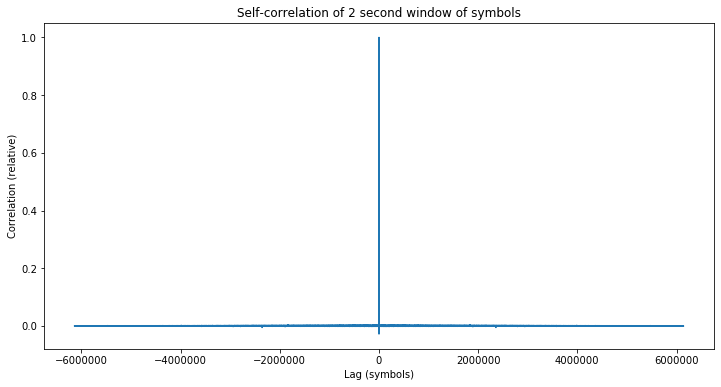

In [6]:
corr_x = scipy.signal.correlate(x_small.astype('float'), x_small.astype('float'))
corr_x /= np.max(np.abs(corr_x))
plt.figure(figsize = (12,6), facecolor = 'w')
lags = np.arange(-x_small.size+1, x_small.size)
plt.plot(lags, corr_x)
del lags, corr_x
plt.title('Self-correlation of 2 second window of symbols')
plt.ylabel('Correlation (relative)')
plt.xlabel('Lag (symbols)');

In [7]:
y_small = -x_small[1:].astype('float') * x_small[:-1].astype('float')

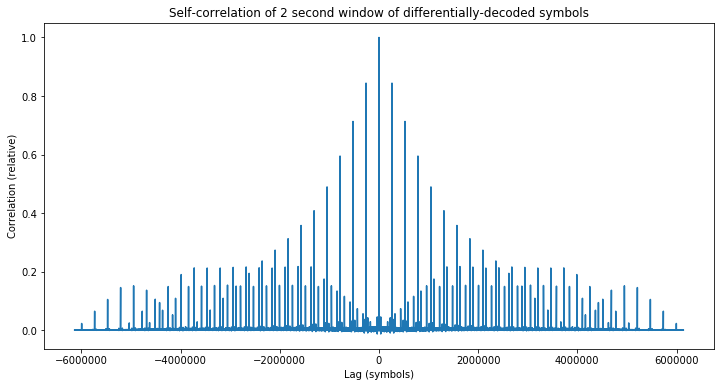

In [8]:
corr_y = scipy.signal.correlate(y_small, y_small)
corr_y /= np.max(np.abs(corr_y))
plt.figure(figsize = (12,6), facecolor = 'w')
lags = np.arange(-y_small.size+1, y_small.size)
plt.plot(lags, corr_y)
del lags
plt.title('Self-correlation of 2 second window of differentially-decoded symbols')
plt.ylabel('Correlation (relative)')
plt.xlabel('Lag (symbols)')
P = np.argmax(corr_y[corr_y.size//2+1:]) + 1
del corr_y

In [9]:
P

261888

In [10]:
256 * 1023

261888

In [11]:
# Re-run to regenerate the object_A_bits_packed.u8 file
#bits = (x >= 0).astype('uint8')
#bits = bits[1:] ^ bits[:-1] ^ 1
#np.packbits(bits).tofile('object_A_bits_packed.u8')

In [12]:
bits = np.unpackbits(np.fromfile('object_A_bits_packed.u8', dtype = 'uint8'))

In [13]:
bb = bits[:bits.size//P*P].reshape((-1,P))

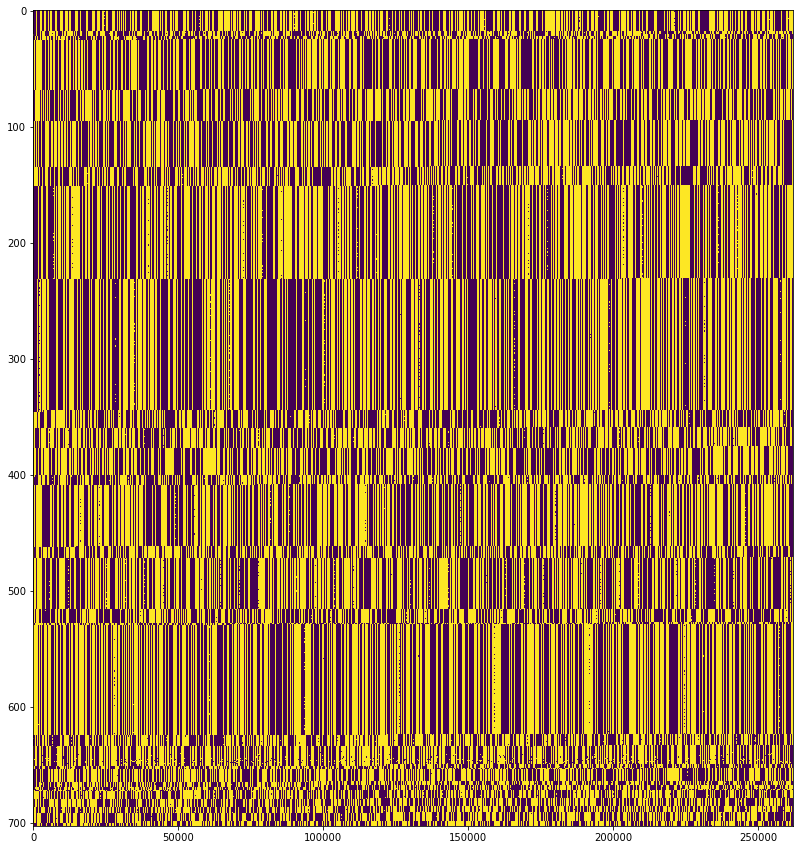

In [14]:
plt.figure(figsize = (15,15), facecolor = 'w')
plt.imshow(bb, aspect = 400);

In [15]:
section = slice(250,340)

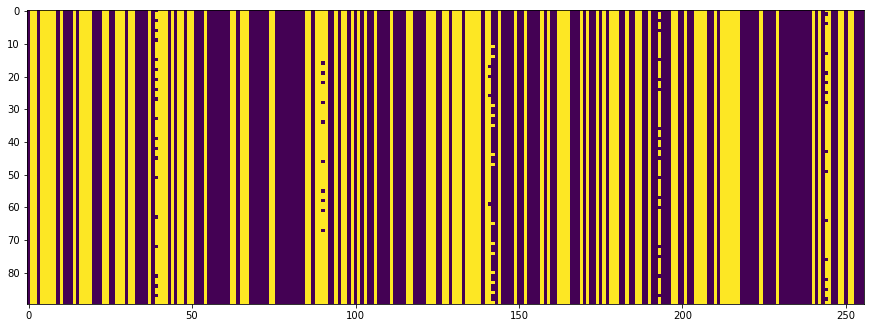

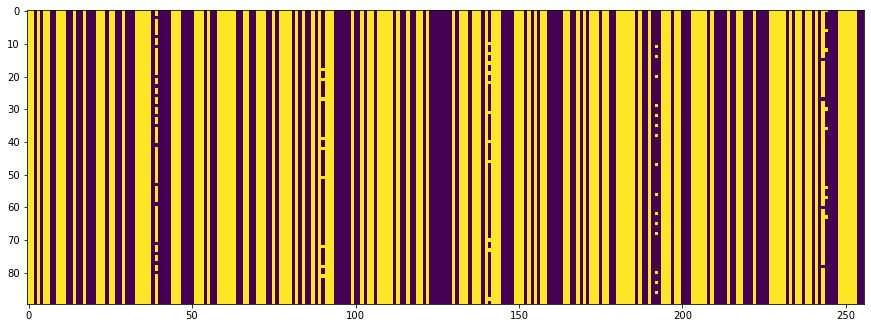

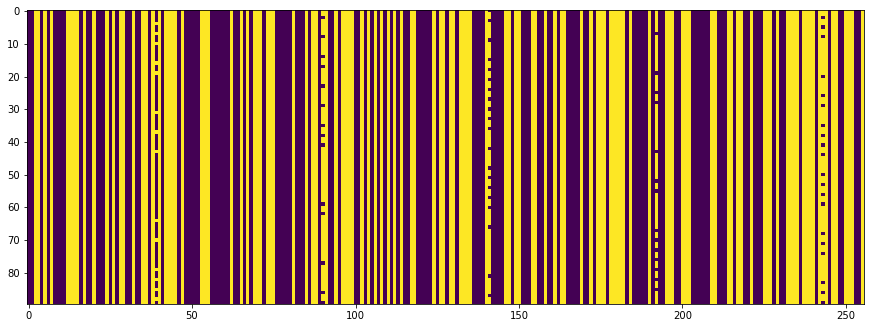

In [16]:
for j in range(0,256*3,256):
    plt.figure(figsize = (15,15), facecolor = 'w')
    plt.imshow(bb[section,j:j+256], aspect = 1)

In [17]:
flips = ~np.all(bb[section] == bb[section][0], axis = 0)

In [18]:
list(zip((np.where(flips)[0]//51)[:100], (np.where(flips)[0]%51)[:100]))

[(0, 39),
 (1, 39),
 (2, 39),
 (2, 40),
 (3, 40),
 (4, 40),
 (5, 40),
 (6, 40),
 (7, 40),
 (8, 40),
 (9, 40),
 (9, 41),
 (10, 41),
 (11, 41),
 (12, 41),
 (13, 41),
 (14, 41),
 (15, 41),
 (15, 42),
 (16, 42),
 (17, 42),
 (18, 42),
 (19, 42),
 (20, 42),
 (21, 42),
 (22, 42),
 (22, 43),
 (23, 43),
 (24, 43),
 (25, 43),
 (26, 43),
 (27, 43),
 (28, 43),
 (28, 44),
 (29, 43),
 (29, 44),
 (30, 44),
 (31, 44),
 (32, 44),
 (33, 44),
 (34, 44),
 (35, 44),
 (35, 45),
 (36, 44),
 (36, 45),
 (37, 45),
 (38, 45),
 (39, 45),
 (40, 45),
 (41, 45),
 (42, 45),
 (42, 46),
 (43, 46),
 (44, 46),
 (45, 46),
 (46, 46),
 (47, 46),
 (48, 46),
 (48, 47),
 (49, 46),
 (49, 47),
 (50, 47),
 (51, 47),
 (52, 47),
 (53, 47),
 (54, 47),
 (55, 47),
 (55, 48),
 (56, 48),
 (57, 48),
 (58, 48),
 (59, 48),
 (60, 48),
 (61, 48),
 (62, 48),
 (62, 49),
 (63, 49),
 (64, 49),
 (65, 49),
 (66, 49),
 (67, 49),
 (68, 49),
 (69, 49),
 (69, 50),
 (70, 50),
 (71, 50),
 (72, 50),
 (73, 50),
 (74, 50),
 (75, 50),
 (76, 0),
 (77, 0),
 (

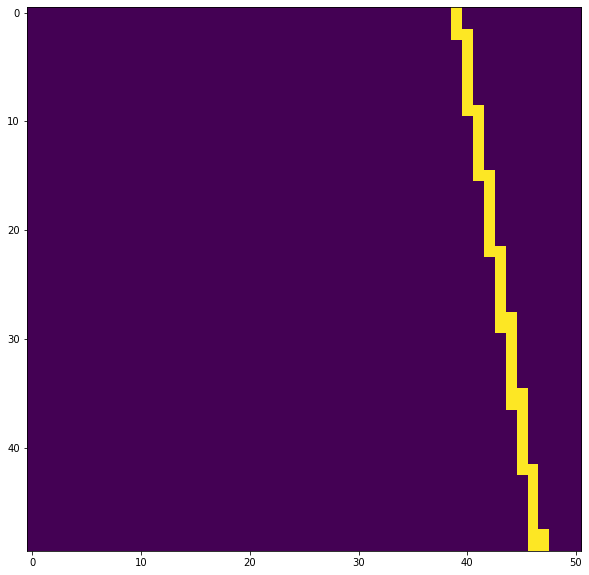

In [19]:
plt.figure(figsize = (10,10), facecolor = 'w')
l = 51
flips2 = flips[:flips.size//l*l].reshape((-1,l))
plt.imshow(flips2[:50], aspect = 1)
flips2T = flips2.T.ravel()